## Visualization Project Part 1: Finding your Data

For this project, I'm going to be using a dataset that I've been collecting as part of a longterm side project that I have found some usefulness with so far, but haven't had the opportunity to really explore, and especially I haven't had the opportunity to create intresting visualizations with.

This data uses ratings for beers that can be found on the website/app Untappd. In this case I've collected the beer names, styles, and ratings for all of the beers that a brewery called Burial Beer (located in Asheville, NC) makes. This has been updated weekly for quite a few months and the dataframe is in order of first added beers first, newest beers last.

I would like to be able to display how average or median scores for styles have changed over time, and to have the flexibility to see how the beers that make up that average compare to each other and to be able to visualize those beers' scores based on their order of release (or addition to Untappd).

In [120]:
import pandas as pd
import altair as alt

data = pd.read_csv("burial_untappd_12-06-2023.csv", index_col=[0])
data.reset_index(inplace=True)
data.head()

index              beer_names                   style  07-28-2022  \
0      0                 Hatchet        Pilsner - German        3.58   
1      1     Skillet Donut Stout          Stout - Coffee        4.17   
2      2  Billhook Farmhouse Ale  Farmhouse Ale - Saison        3.70   
3      3          Scythe Rye IPA               IPA - Rye         NaN   
4      4          Hacksaw Dunkel   Lager - Munich Dunkel        3.65   

   07-29-2022  07-30-2022  07-31-2022  08-01-2022  08-02-2022  08-03-2022  \
0        3.58        3.58        3.58        3.58        3.58        3.58   
1        4.17        4.17        4.17        4.17        4.17        4.17   
2        3.70        3.70        3.70        3.70        3.70        3.70   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4        3.65        3.65        3.65        3.65        3.65        3.65   

   ...  06-22-2023  06-29-2023  07-05-2023  07-12-2023  07-19-2023  \
0  ...        3.58        3.58        3.58        3.58        3.58   
1  ...        4.16        4.16        4.16        4.16        4.16   
2  ...        3.70        3.70        3.70        3.70        3.70   
3  ...        3.92        3.92        3.92        3.92        3.92   
4  ...        3.65        3.65        3.65        3.65        3.65   

   07-26-2023  11-15-2023  11-22-2023  11-29-2023  12-06-2023  
0        3.58        3.58        3.58        3.58        3.58  
1        4.16        4.16        4.16        4.16        4.16  
2        3.70        3.70        3.70        3.70        3.70  
3        3.92        3.92        3.92        3.92        3.92  
4        3.65        3.65        3.65        3.65        3.65  

[5 rows x 127 columns]

## Visualization Project Part 2: Sketching your Data

There are a couple of tasks that I would specifically like this data to complete:
#### How have summary scores of styles changed over time?
I want to be able to see if this brewery has become better in the eyes of their consumers (or Untappd users as a proxy) at brewing certain styles or if opinion of their beers has decreased in general. We can do this by taking either the mean or the median (both?) of scores for each style represented in the data for each date that data was collected, and plotting if/how those have changed over time. This task could be performed quarterly to assess if there are any issues in the brewery or beers being produced that needs to be assessed.
#### Are beers of a certain style scoring consistently or is there high variability? And has that changed over time?
I want to be able to see how consistent this brewery's beers score, specifically within each style. Are they taking huge risks and seeing some beers score extremely well while others flop? Or are they achieving consistent high scores? This would be useful to understand the brewery's strategy and could be interesting for leadership to understand what kind of risks are being taken or where they could be taken in the future.

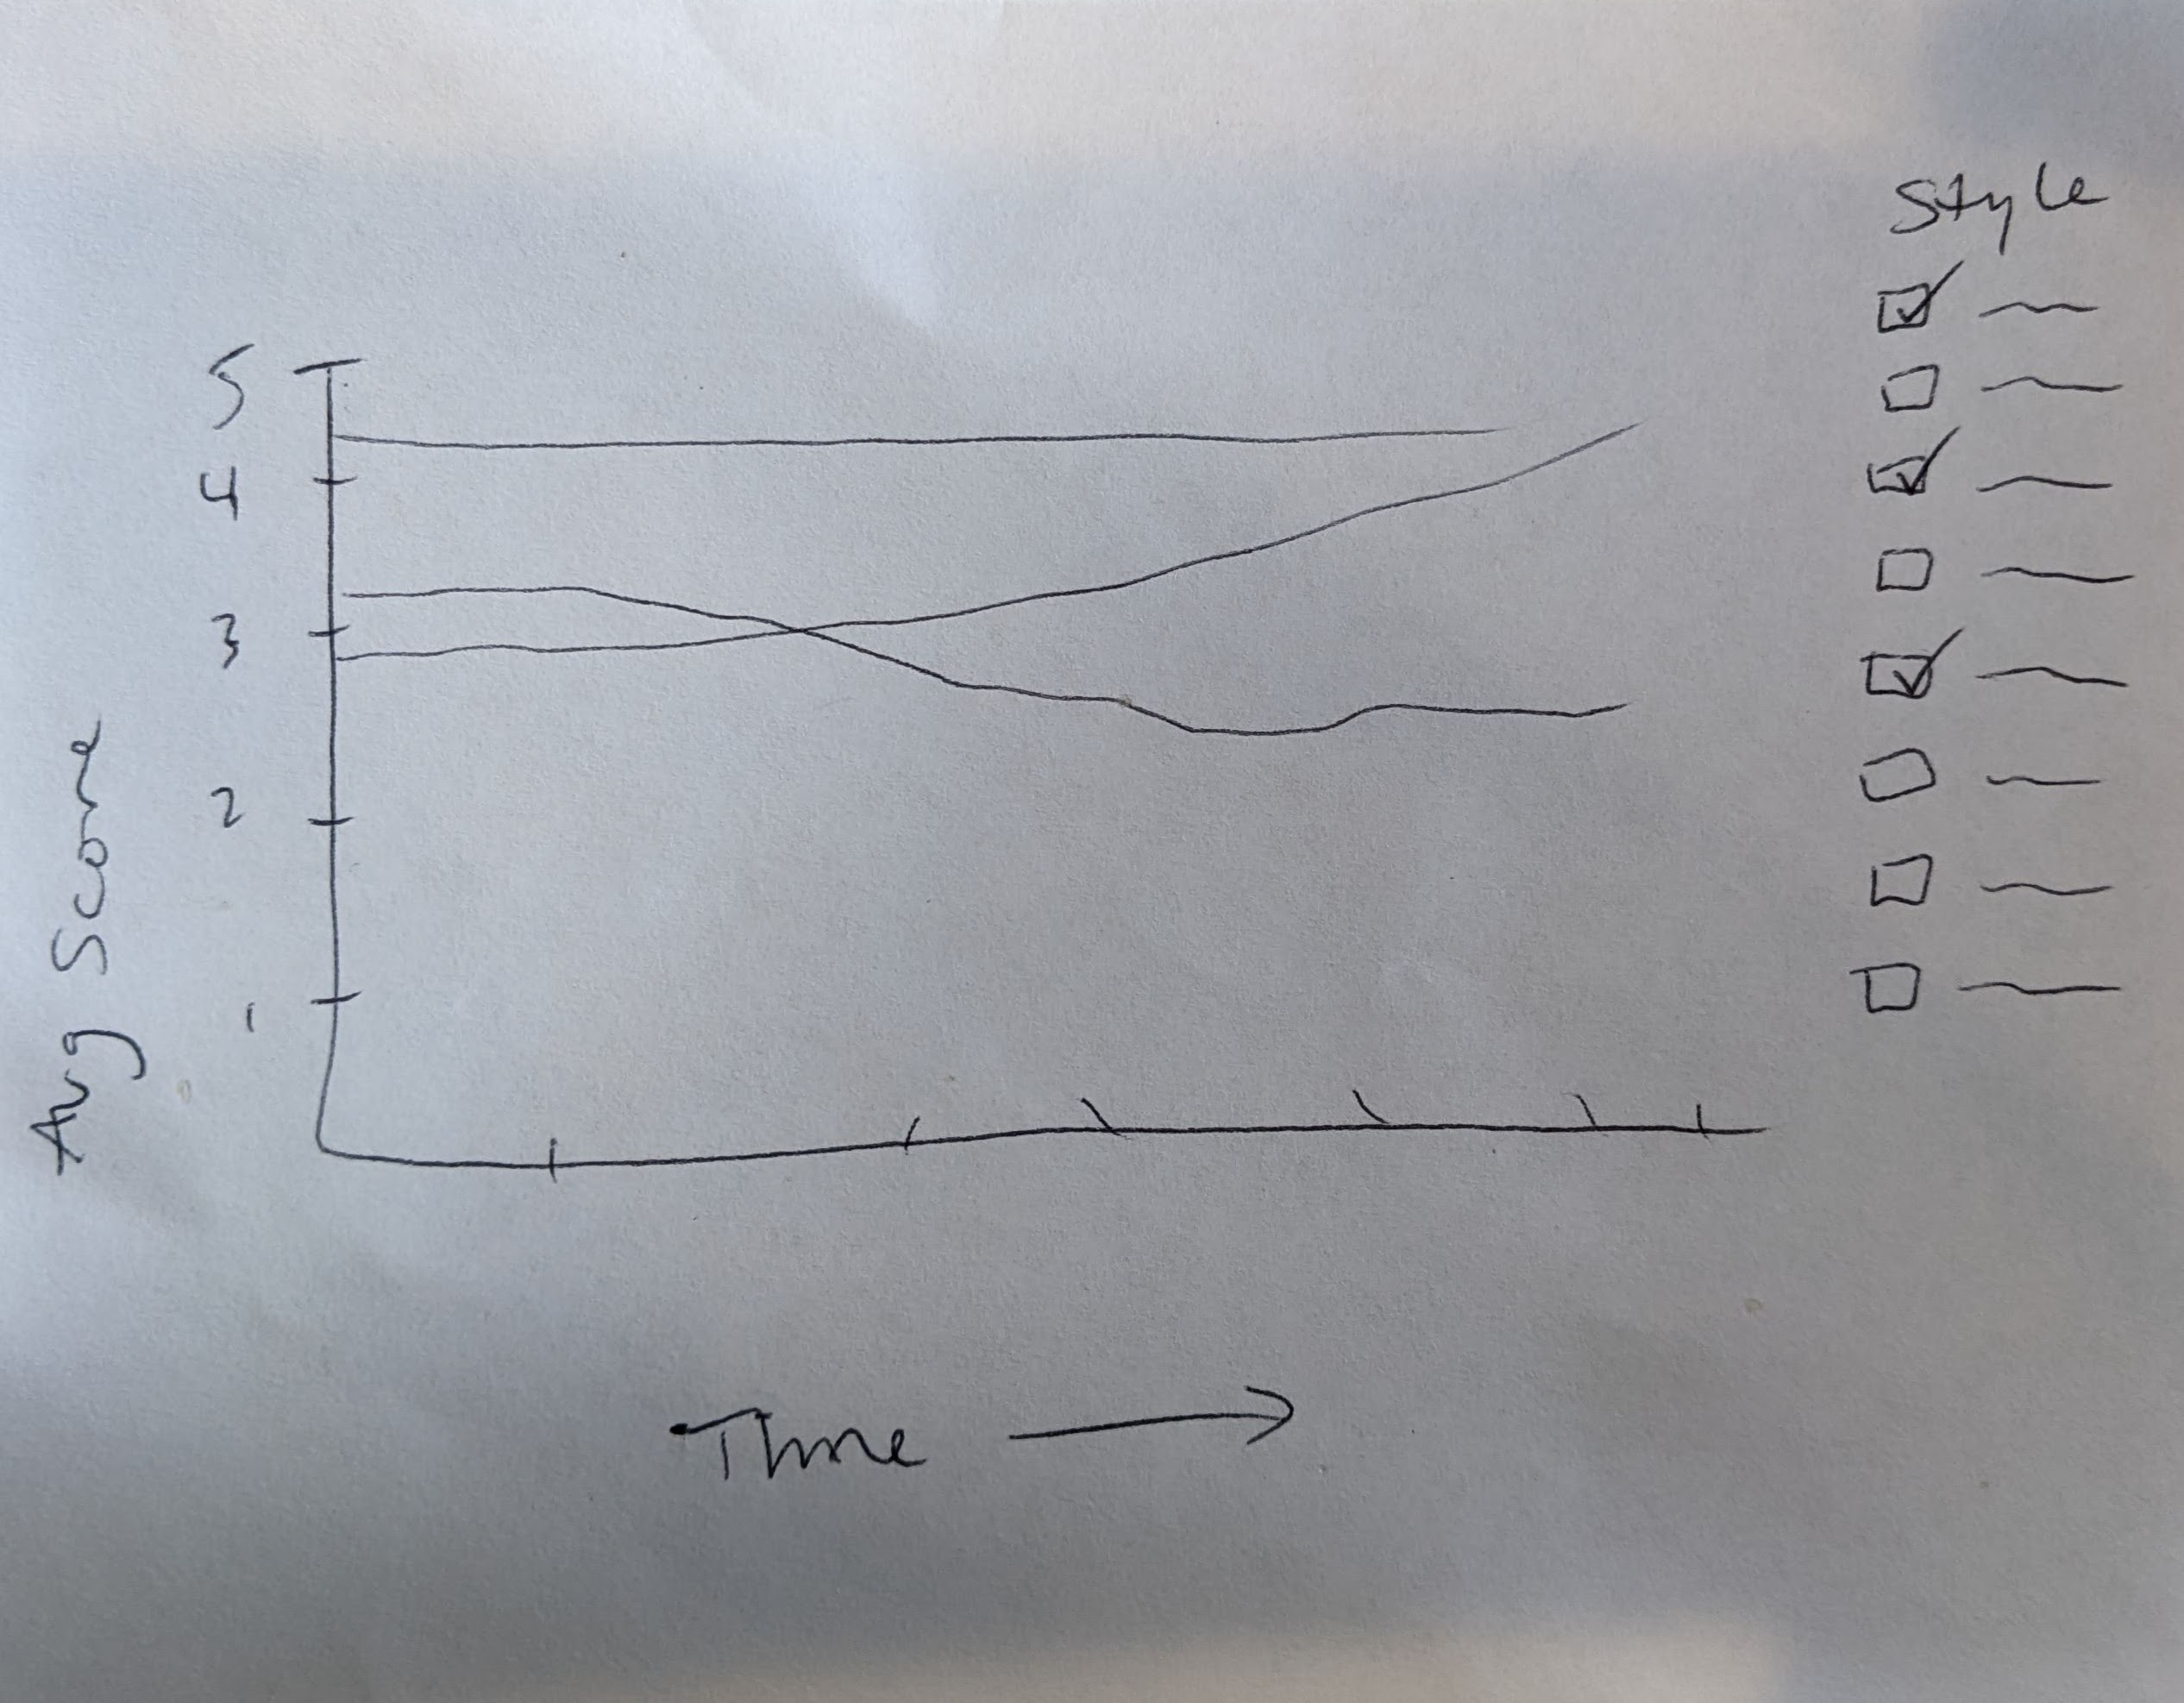


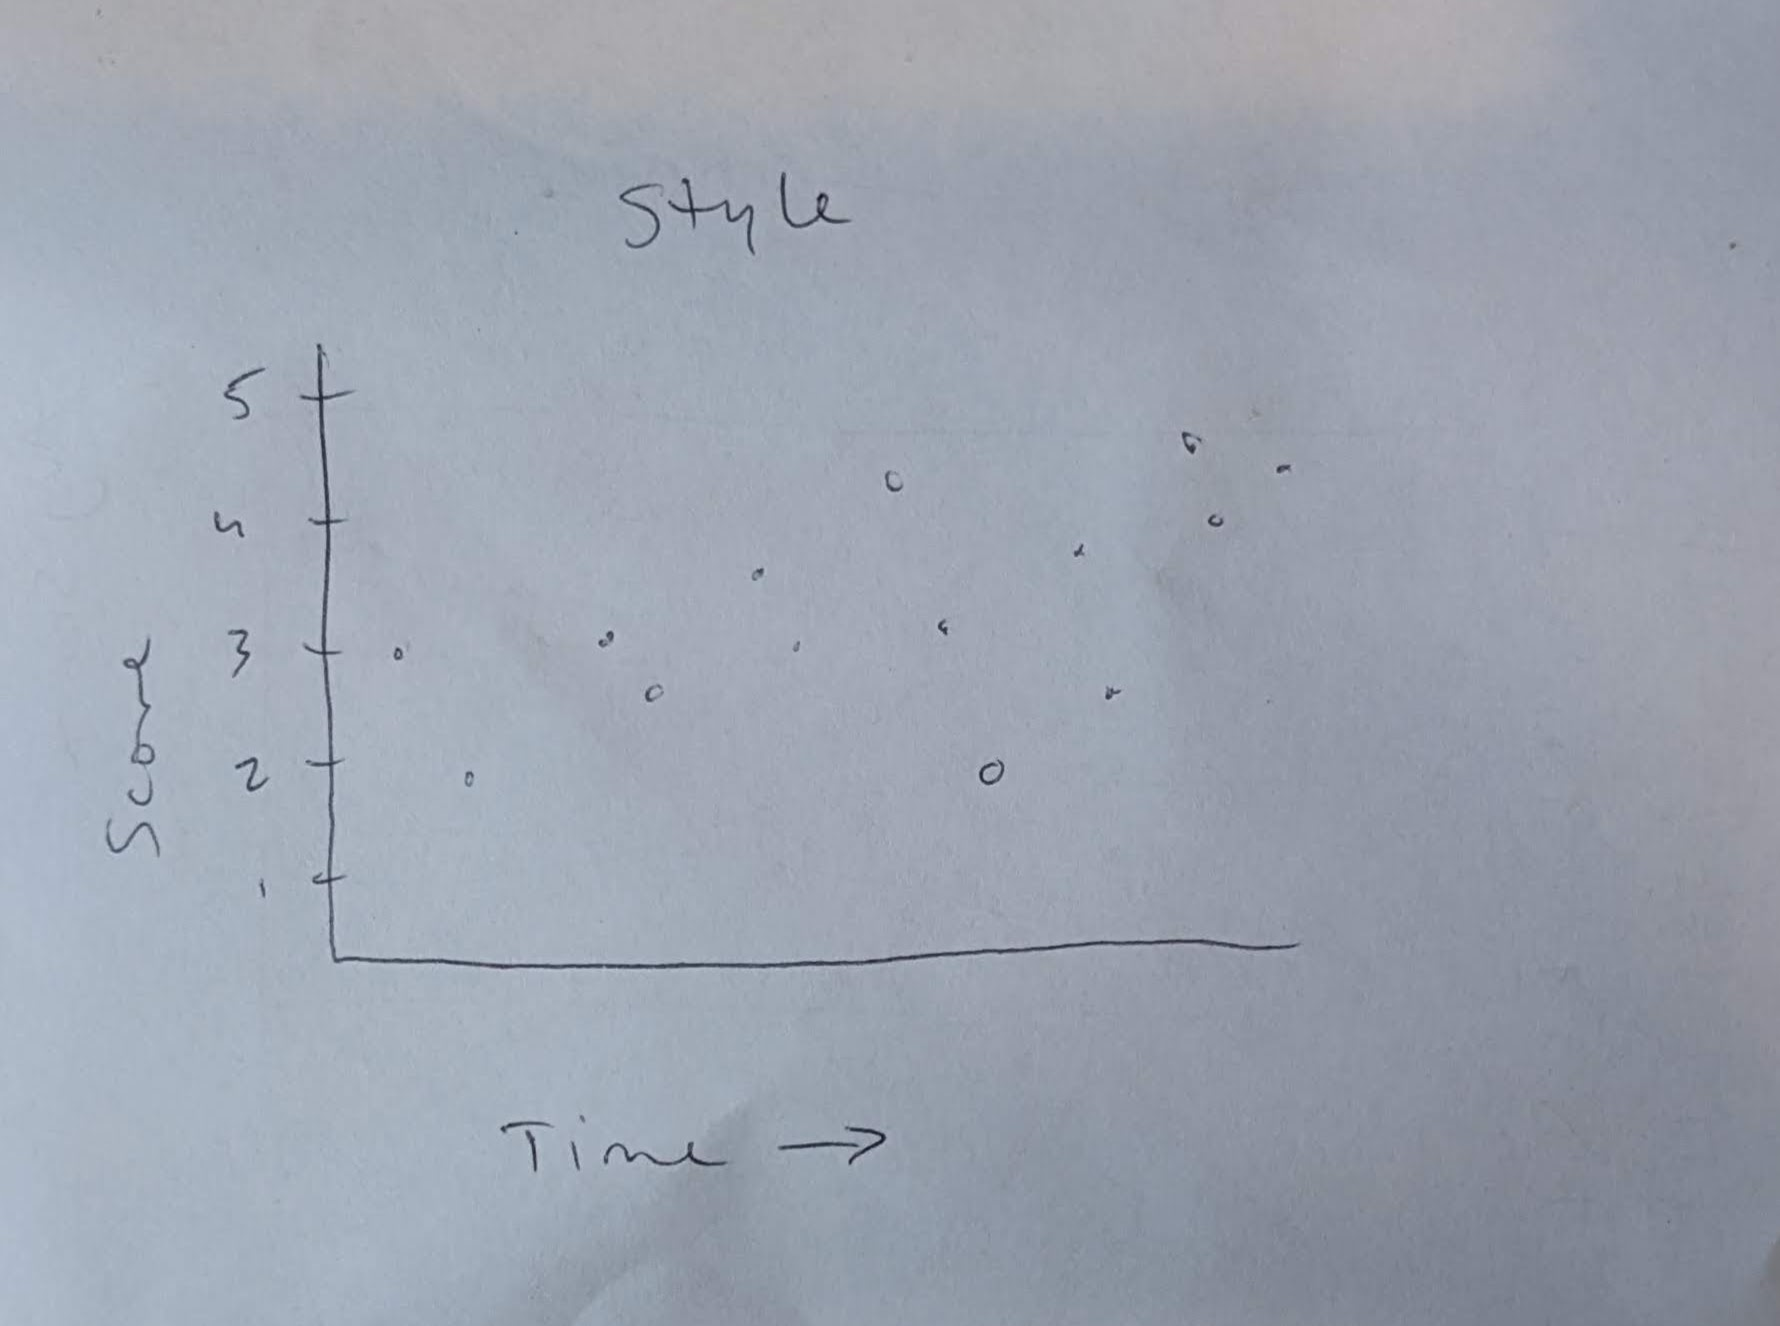

## Implementing Visualizations

In [125]:
# Use date that you would like to look at scores for (usually the most recent date that data was updated)
date_str = '12-06-2023'

In [162]:
selection = alt.selection_point(fields=['style'], bind='legend')

chart = alt.Chart(data, title='Beer Scores Grouped by Style').mark_circle().encode(
    alt.X('index').title('Order Added to Untappd'),
    alt.Y(date_str).title('Score'),
    color = alt.Color('style', legend=alt.Legend(columns=4, symbolLimit=0)),
    tooltip = [alt.Tooltip('beer_names', title='Beer Name'), alt.Tooltip(date_str, title='Score'), alt.Tooltip('style', title='Style')],
    opacity = alt.condition(selection, alt.value(1), alt.value(0.05))
).add_params(
    selection
).properties(
    width = 550,
    height = 550,
)

chart + chart.transform_regression('index', date_str).mark_line(color='red')

alt.LayerChart(...)

My initial paper designs turned out to not make total sense as they were, for a variety of reasons, but it's been interesting to see how the final visualization turned out while running into roadblocks with the sketches. For one, using a regression for individual styles was not a great method, as many styles were either brewed only early on, only recently, or very intermittently, or maybe only once! So the regression lines ultimately didn't make much sense unless a style had been brewed at least semi-regularly during the brewery's entire lifespan.

So what I settled on was a scatterplot with all beers plotted in order of their first release date and with their current scores. I used interactive elements on the points themselves, where if you hover over a point you're able to see the beer name, score, and style. The legend is also interactive: if you click on a style in the legend, the points linked to that style will be highlighted in the chart, and all others will be very transparent. In this way, users are able to hone in, first on the style they would like to see data for, and then on the specific beers in that style or anywhere else (for instance if you wanted to see what beers are near a point in score or date released).

## Visualization Project Part 3: A Plan for Evaluation

The question I wanted to answer with this data was how this brewery's beer scores have changed over time, specifically being able to look at groupings by beer style. I was able to recruit a few people from the Production, Brand, and Strategy departments of this brewery to answer that question, using a semistructured interview approach.

One thing that was clear from the start when evaluating this visual, was that people needed some initial guidance into how to use the visual. Everyone I showed was initially overwhelmed with the density of points and the length of the legend. Without interacting with this plot, there really isn't any way to gain any insights from it. Once I explained the interactive nature of the plot, I let folks click around to see what they would do and discover. At first most people clicked a style from the legend at random and then quickly became confused on how to show all of the points again (also an easy enough explanation). Then people tended to search the highest and lowest values out and hover over them, then selecting that style to see how the rest of the beers in that style scored.

It was interesting that one tester pointed out how the lowest low scores are higher now than in the past, occurring around the same time that beers started scoring consistently at the highest level (around 4.5). It would appear from that insight that the beers are improving and possibly becoming consistently better.

Another tester found some styles like 'IPA - American' where the average score appears to be the same, but the grouping becomes much tighter and more consistent in the most recent data, rather than the wider spread of scores we see at the beginning.

I think that once users figured out what they were able to do interactively with the chart, it became useful for basic insights into how this brewery has performed with styles and generally over time. The amount of data that's clustered into a narrow band makes this chart overwhelming at first and the amount of dead space at the bottom of the chart is something I would like to work on in future iterations. The length of the legend is also daunting and the beer style names used there are not the most intuitive unless the user is also an avid user of Untappd.